### 500 HZ 70mVpp.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import numpy as np
import scipy
from scipy.optimize import curve_fit

#### load data

In [4]:
input_csv = "vidro-700Hz-100mBias1.csv"

df = pd.read_csv(input_csv, comment='#', names=['x', 'y', 'p', 't'])
df.head()

,x,y,p,t
0,628,294,1,7424
1,628,295,1,7424
2,629,290,1,7424
3,630,290,1,7424
4,629,291,1,7424


### Filter (small region just to calculate phase per pixel) and see the ROI


Number of data points: 528
            x    y  p        t
12056635  628  217  1  1010844
12056636  629  217  1  1010844
12056637  632  217  1  1010844
12056638  629  216  1  1010844
12056639  633  220  1  1010844
...       ...  ... ..      ...
12057160  632  538  0  1010872
12057161  628  540  0  1010872
12057162  631  540  0  1010872
12057163  630  541  0  1010872
12057164  632  543  0  1010872

[528 rows x 4 columns]
Time range: 1010844 to 1010872
Filtered data:
     x    y  p        t
0  628  217  1  1010844
1  629  217  1  1010844
2  632  217  1  1010844
3  629  216  1  1010844
4  633  220  1  1010844
Number of events: 528
Density array shape: (195608,)
Density indices shape: (528,)
Max density index: 152880
Min density index: 2351
Densities size: 195608
Density indices (first 10): [22736 22736 22736 22344 23912 24696 24696 25088 25088 25088]


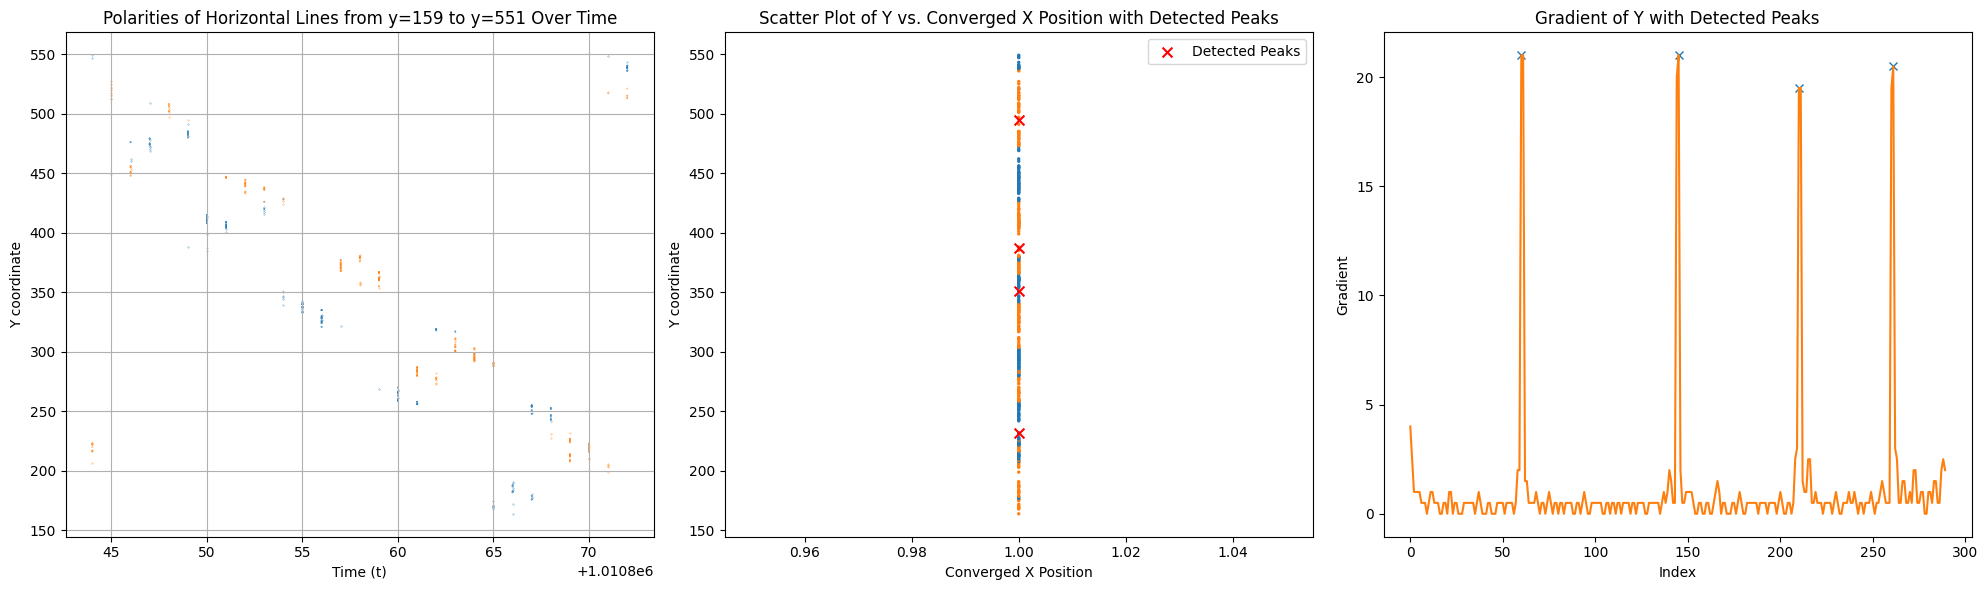

[232 351 387 495]


In [35]:
from polarityarea2 import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Define the parameters
tmin = 1010844
tmax = 1010872
ymin = 159
ymax = 551
xmin = 628
xmax = 633
polarity = None

# Filter the DataFrame for the specified horizontal line of pixels
line_df = df[(df['x'] >= xmin) & (df['x'] <= xmax) & (df['y'] >= ymin) & (df['y'] <= ymax)]

# Apply time filtering if specified
if tmin is not None:
    line_df = line_df[line_df['t'] >= tmin]
if tmax is not None:
    line_df = line_df[line_df['t'] <= tmax]

# Check if the filtered DataFrame is empty
if line_df.empty:
    print("No data points found for the given filters.")
else:
    print(f"Number of data points: {len(line_df)}")
    print(line_df)
    print(f"Time range: {line_df['t'].min()} to {line_df['t'].max()}")
    line_df.head()

# Sort the data based on y
x = line_df['x'].to_numpy()
y = line_df['y'].to_numpy()
t = line_df['t'].to_numpy()
p = line_df['p'].to_numpy()

idx = np.argsort(y)
x = x[idx]
y = y[idx]
t = t[idx]
p = p[idx]

# Separate the data based on polarity
yp = y[p == 1]
yn = y[p == 0]

# Calculate the gradient of yp
gradyp = np.gradient(yp)

# Find peaks in the gradient of the y data for polarity = 1
peaksidx, _ = find_peaks(gradyp, distance=10, prominence=2)

# Create the ysplit and phisplit arrays
ysplit = yp[peaksidx]
phisplit = np.arange(0, 2 * np.pi * len(ysplit), 2 * np.pi)

# Create a subplot grid with 1 row and 3 columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# First plot: Using plot_lines_polarity_over_time
plot_lines_polarity_over_time(input_csv, xmin, xmax, ymin, ymax, tmin, tmax, polarity, ax=ax1)

# Second plot: Scatter plot of y vs. position (converged x)
colors = ["C0", "C1"]
colors_vec = [colors[p] for p in line_df['p']]

# Set all x positions to the same value (e.g., 1) to align them vertically
converged_x = np.ones(len(t))
ax2.scatter(converged_x, y, s=2, c=colors_vec)

# Overlay the detected peaks on the scatter plot
ax2.scatter(converged_x[peaksidx], yp[peaksidx], s=50, c="red", marker="x", label="Detected Peaks")

# Configure labels and title for the second plot
ax2.set_xlabel('Converged X Position')
ax2.set_ylabel('Y coordinate')
ax2.set_title('Scatter Plot of Y vs. Converged X Position with Detected Peaks')
ax2.legend()

# Third plot: Gradient of y with peaks
ax3.plot(peaksidx, abs(gradyp[peaksidx]), "x")
ax3.plot(gradyp)
ax3.set_title('Gradient of Y with Detected Peaks')
ax3.set_xlabel('Index')
ax3.set_ylabel('Gradient')

plt.tight_layout()
plt.show()

print(ysplit)


In [36]:
phisplit

array([ 0.        ,  6.28318531, 12.56637061, 18.84955592])

[0.         0.05279988 0.10559975 0.15839963 0.21119951 0.26399938
 0.31679926 0.36959914 0.42239901 0.47519889 0.52799877 0.58079864
 0.63359852 0.68639839 0.73919827 0.79199815 0.84479802 0.8975979
 0.95039778 1.00319765 1.05599753 1.10879741 1.16159728 1.21439716
 1.26719704 1.31999691 1.37279679 1.42559667 1.47839654 1.53119642
 1.5839963  1.63679617 1.68959605 1.74239593 1.7951958  1.84799568
 1.90079556 1.95359543 2.00639531 2.05919518 2.11199506 2.16479494
 2.21759481 2.27039469 2.32319457 2.37599444 2.42879432 2.4815942
 2.53439407 2.58719395 2.63999383 2.6927937  2.74559358 2.79839346
 2.85119333 2.90399321 2.95679309 3.00959296 3.06239284 3.11519272
 3.16799259 3.22079247 3.27359234 3.32639222 3.3791921  3.43199197
 3.48479185 3.53759173 3.5903916  3.64319148 3.69599136 3.74879123
 3.80159111 3.85439099 3.90719086 3.95999074 4.01279062 4.06559049
 4.11839037 4.17119025 4.22399012 4.27679    4.32958988 4.38238975
 4.43518963 4.48798951 4.54078938 4.59358926 4.64638913 4.699189

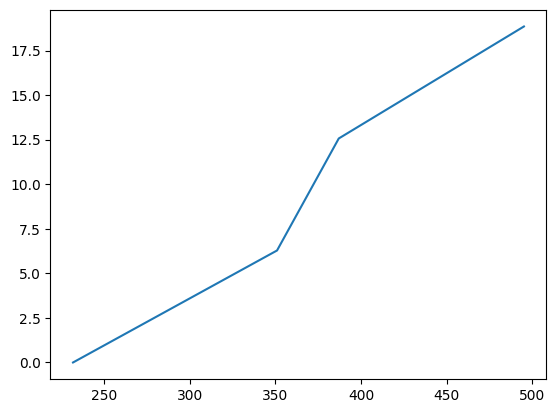

In [37]:
yroi = np.arange(ysplit[0], ysplit[-1] + 1)
phiroi = np.interp(yroi, ysplit, phisplit)
plt.plot(yroi, phiroi)
phiroi = np.mod(phiroi, 2 * np.pi) #between 0,2pi
print(phiroi)

### filter data (main data- bigger time period)

In [38]:
%matplotlib inline
# Define the parameters
tmin = 100000
tmax = 2000000
ymin = yroi[0]
ymax = yroi[-1]


# Filter the DataFrame for the specified horizontal line of pixels
line_df = df[(df['x'] >= xmin) & (df['x'] <= xmax) & (df['y'] >= ymin) & (df['y'] <= ymax)]

# Apply time filtering if specified
if tmin is not None:
    line_df = line_df[line_df['t'] >= tmin]
if tmax is not None:
    line_df = line_df[line_df['t'] <= tmax]

# Check if the filtered DataFrame is empty
if line_df.empty:
    print("No data points found for the given filters.")
else:
    print(f"Number of data points: {len(line_df)}")
    print(line_df)
    print(f"Time range: {line_df['t'].min()} to {line_df['t'].max()}")
    line_df.head()


Number of data points: 16999561
            x    y  p        t
1220168   631  447  0   100000
1220169   629  423  0   100000
1220170   633  423  0   100000
1220171   628  355  0   100000
1220172   633  363  0   100000
...       ...  ... ..      ...
25105183  632  309  0  1999998
25105184  633  303  0  1999998
25105185  630  300  0  1999998
25105195  629  237  0  1999999
25105196  633  248  0  1999999

[16999561 rows x 4 columns]
Time range: 100000 to 1999999


### phase per pixel method application

yp: [103 100  93 ...  97  39  35]
phase: [5.43838728 5.27998765 4.91038852 ... 5.12158802 2.05919518 1.84799568]
9325699
9325699


(0.0, 5000.0)

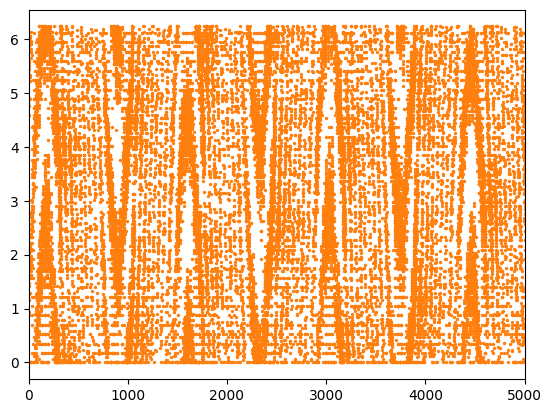

In [39]:

colors = ["C0", "C1"]

colors_vec = [colors[p] for p in line_df['p']]
x = line_df['x']
p = line_df['p']
t = line_df['t']
y = line_df['y']

x = np.array(x)
y = np.array(y)
p = np.array(p)
t = np.array(t)

idx = np.argsort(t)

x = x[idx]
y = y[idx]
t = t[idx]
p = p[idx]

t = t-t[0]

yp = y[p==1]
tp = t[p==1]
yn = y[p==0]

tp = tp-tp[0]

yp = yp-ymin

phase = np.array([phiroi[yi] for yi in yp])

print("yp:", yp)
#print("phiroi:", phiroi[180])
print("phase:", phase)
##yp = np.mod(yp, pixels_per_period)
#yp = np.mod(yp, 84)

tp_uniques = np.unique(tp)

##phase = yp*phaseperpixel
print(len(tp))
print(len(phase))
plt.scatter(tp, phase, s=2, c="C1")
plt.xlim(0,5000)

### Calculation of phase (centroids)

In [40]:
tp_uniques = np.unique(tp)
centroid_y = []
tval_vec = []

for i,tval in enumerate(tp_uniques):
    yval = phase[tp==tval]
    ycomplex = np.cos(yval)+1j*np.sin(yval)

    ymean = np.angle(np.mean(ycomplex))

    
    #print(i, ymean)
    centroid_y.append(ymean)
    tval_vec.append(tval)

    if i > 5500:
        break

centroid_y = np.array(centroid_y)
tval_vec = np.array(tval_vec)


In [41]:
centroid_y,tval_vec

(array([-1.18799722, -0.09488422,  1.16159728, ..., -2.43184829,
        -1.76474127,  0.34906585]),
 array([   0,    1,    3, ..., 7304, 7305, 7307], dtype=int64))

### phases of events over time

(0.0, 2000.0)

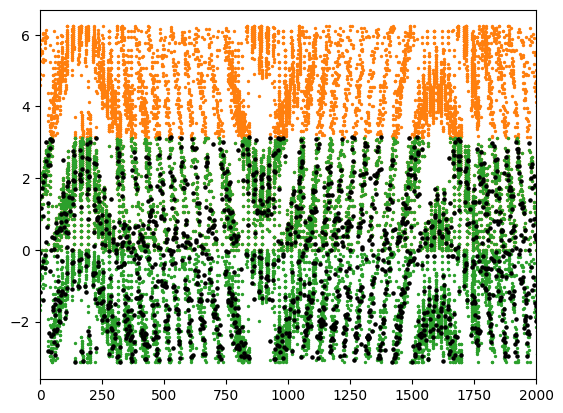

In [42]:
plt.scatter(tp, phase, s=2, c="C1")
plt.scatter(tp, np.mod(phase+np.pi, 2*np.pi)-np.pi, s=2, c="C2")
plt.scatter(tval_vec, centroid_y, s=5, c="k")
plt.xlim(0,2000)

### plot of the real and imaginary parts of complex numbers representing phase centroids

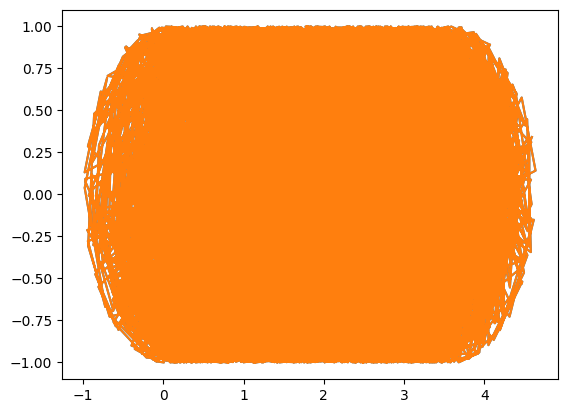

In [43]:
phase_complex = np.cos(centroid_y)+1j*np.sin(centroid_y)

#phase_complex = phase_complex[:100]

plt.plot(phase_complex.real+tval_vec/2000, phase_complex.imag, '-')
plt.plot(phase_complex.real+tval_vec/2000, phase_complex.imag, '-')


### Kalman filter to smooth the phase data derived from the centroid phases

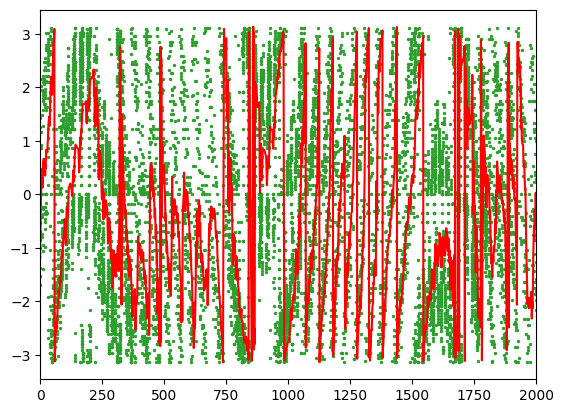

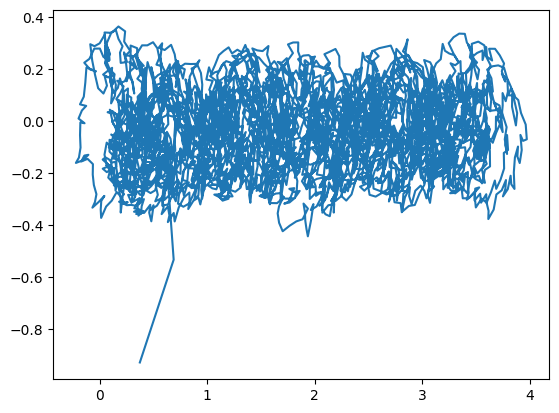

In [50]:
from kalman import KalmanTracking


Track = KalmanTracking()
Track.cov = 0.5 #Sets the initial covariance, representing the uncertainty in the initial state estimate.
Track.error_proc = 0.0001 #Sets the estimated process error, representing how much you expect the process to vary between steps.
Track.error_measurement = 0.03+0.03j #Sets the estimated measurement error, which includes both real and imaginary components.

complex_kalman = np.array([Track(c) for c in phase_complex])
phase_kalman = np.angle(complex_kalman)
#plt.plot(phase_complex.real+tval_vec/10000, phase_complex.imag, '.')
#plt.plot(phase_kalman.real+tval_vec/10000, phase_kalman.imag, '.')


plt.figure()
plt.scatter(tp, np.mod(phase+np.pi, 2*np.pi)-np.pi, s=2, c="C2")
#plt.scatter(tval_vec, centroid_y, s=5, c="k")
plt.plot(tval_vec, phase_kalman, c="r")
plt.xlim(0,2000)

plt.figure()
plt.plot(complex_kalman.real+tval_vec/2000, complex_kalman.imag, '-')


6.089694725927718

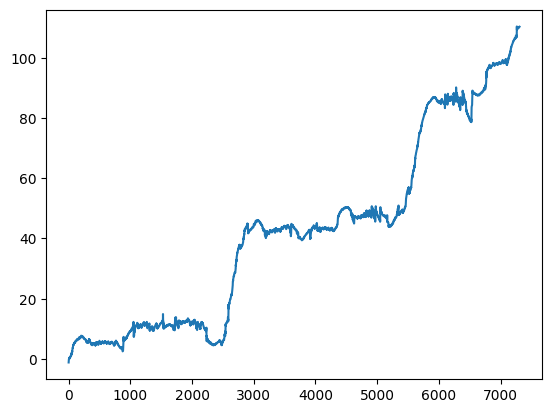

In [51]:
plt.plot(tval_vec, centroid_y)




np.ptp(np.diff(centroid_y)).max()


### Phase Unwrapping and Continuous Phase Analysis


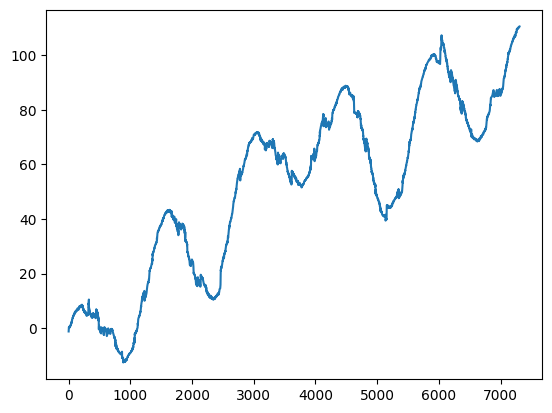

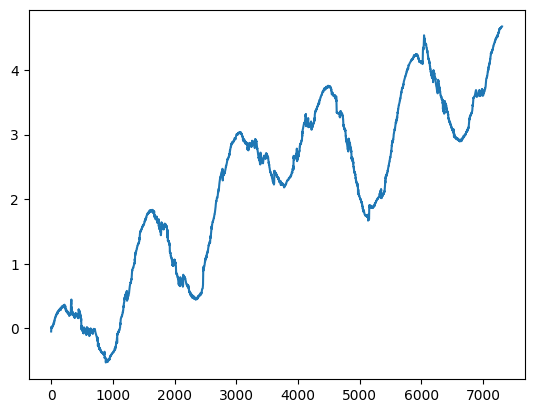

In [52]:
wavelength = 532e-9
centroid_y = np.unwrap(centroid_y)
centroid_y = np.unwrap(phase_kalman)

diff_phase = centroid_y - np.append([centroid_y[0]], np.diff(centroid_y))
plt.plot(tval_vec, centroid_y)
#plt.plot(tval_vec, diff_phase)
z = centroid_y/(2*np.pi)*wavelength/2

plt.figure()
plt.plot(tval_vec, z/1e-6)


### Displacement calc (nano)

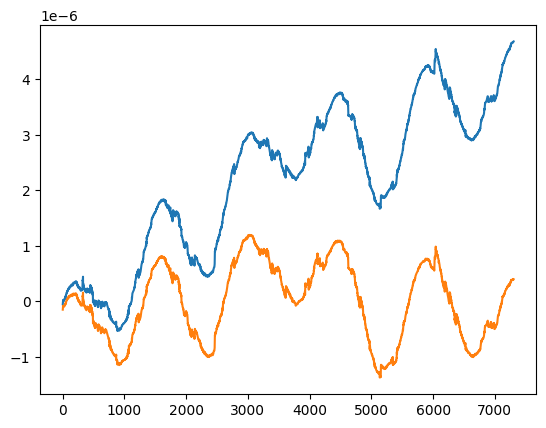

In [53]:
t_step = 1

t_interp = np.arange(tval_vec.min(), tval_vec.max(), t_step)
z_interp = np.interp(t_interp, tval_vec, z)

plt.plot(t_interp, z_interp)

z_detrend = scipy.signal.detrend(z_interp)
plt.plot(t_interp, z_detrend)


### FFT for finding main frequency of the signal

(0.0, 4000.0)

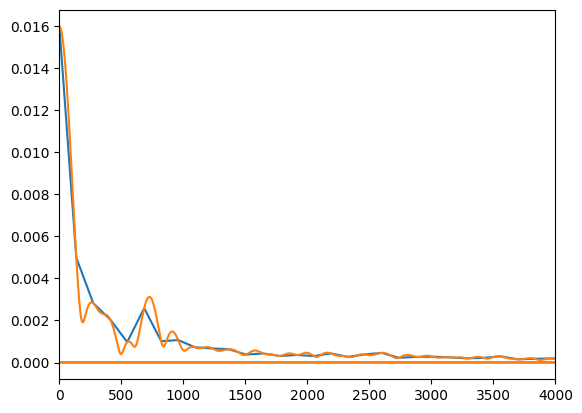

In [54]:
a = np.pad(z_interp, len(z_interp)*2)
a = np.pad(z_interp, 2**20-1)


ft = np.fft.fft(z_interp)
freqs = np.fft.fftfreq(len(ft), d=t_step*1e-6)

plt.plot(freqs, np.abs(ft))

ft = np.fft.fft(a)
freqs = np.fft.fftfreq(len(ft), d=t_step*1e-6)

plt.plot(freqs, np.abs(ft))

plt.xlim(0, 4000)

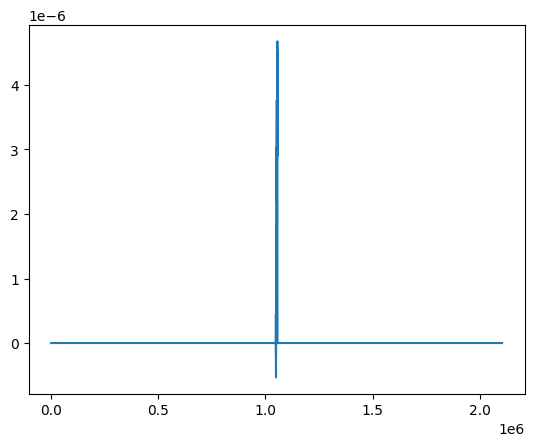

In [55]:
#a = np.pad(z_interp, len(z_interp)*2)

plt.plot(a)